In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
df=pd.read_csv("response.csv")
df.shape
df.info()

NameError: ignored

In [ ]:
for x in df.columns:  
  if df[x].dtype=='object':
      df[x]=pd.Categorical(df[x]).codes
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Response
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df.to_csv("test.csv")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
star1=sum([d['PaymentMethod']for d in df if d['PaymentMethod'] is '0' ])
star2=sum([d['PaymentMethod']for d in df if d['PaymentMethod'] is 1 ])
star3=sum([d['PaymentMethod']for d in df if d['PaymentMethod'] is 2 ])
star4=sum([d['PaymentMethod']for d in df if d['PaymentMethod'] is 3 ])
star5=sum([d['PaymentMethod']for d in df if d['PaymentMethod'] is 4 ])
index=[1]
p1=plt.bar(index,star1,color='yellow')
index=[2]
p2=plt.bar(index,star2,color='lightgreen')
index=[3]
p3=plt.bar(index,star3,color='lightblue')
index=[4]
p4=plt.bar(index,star4,color='pink')
plt.gca().set(title='star rating by category',ylabel='total number of ratings',xlabel='star ratings category')
plt.xticks([])
plt.legend((p1[0],p2[0],p3[0],p4[0]),('star_rating1','star_rating2','star_rating3','star_rating4'))
plt.show()


TypeError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int8   
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int8   
 3   Dependents        7043 non-null   int8   
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int8   
 6   MultipleLines     7043 non-null   int8   
 7   InternetService   7043 non-null   int8   
 8   OnlineSecurity    7043 non-null   int8   
 9   OnlineBackup      7043 non-null   int8   
 10  DeviceProtection  7043 non-null   int8   
 11  TechSupport       7043 non-null   int8   
 12  StreamingTV       7043 non-null   int8   
 13  StreamingMovies   7043 non-null   int8   
 14  Contract          7043 non-null   int8   
 15  PaperlessBilling  7043 non-null   int8   
 16  PaymentMethod     7043 non-null   int8   


In [ ]:
x=df.drop(['Response'],axis=1)
y=df['Response']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Response, dtype: int8

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
n_estimators=[10,500,100,2000]
criterion=['gini','entropy']
min_samples_split=[2,100,20,50,100]
max_depth=[20,30,40,50,None]
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}

In [ ]:
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=1)
rf_g.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini 
[CV]  n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini 
[CV]  n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini 
[CV]  n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini, total=   0.0s
[CV] n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini 
[CV]  n_estimators=10, min_samples_split=100, max_depth=50, criterion=gini, total=   0.0s
[CV] n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=20, max_depth=50, criterion=entropy, total=   0.1s
[CV] n_estimators=10, min_samples_split=20, max_depth=50, criterion=e

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#PREDICT USING THE TRAINED MODEL
predicted_values=rf_g.predict(x)
predicted_values

array([1, 0, 0, ..., 0, 1, 0], dtype=int8)

In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))

ACCUIRACY SCORE
0.8327417293766861


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5174
           1       0.76      0.54      0.63      1869

    accuracy                           0.83      7043
   macro avg       0.80      0.74      0.76      7043
weighted avg       0.83      0.83      0.82      7043



In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5174
           1       0.76      0.54      0.63      1869

    accuracy                           0.83      7043
   macro avg       0.80      0.74      0.76      7043
weighted avg       0.83      0.83      0.82      7043



In [ ]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_g.best_score_

0.8039194060907155

In [ ]:
n_estimators=[10,50,100,200]
criterion=['gini','entropy']
min_samples_split=[2,10,20,50]
max_depth=[20,10,20,30,None]
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}

In [ ]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.model_selection import GridSearchCV
#BUILDING THE MODEL
mytreeone=RandomForestClassifier()
#CROSS VALIDATION TELLS HOW A MODEL PERFORMS ON A DATASET USING MULTIPLE SAMPLES OF TRAIN DATA
mytreeone_g=GridSearchCV(mytreeone,param_grid,cv=5,verbose=2,n_jobs=-1)
mytreeone_g.fit(x,y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
mytreeone_g.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
mytreeone_g.best_score_

0.8049132202077554

In [ ]:
#PREDICT USING THE TRAINED MODEL
predicted_values=mytreeone_g.predict(x)
predicted_values

array([1, 0, 0, ..., 0, 1, 0], dtype=int8)

In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))

ACCUIRACY SCORE
0.8345875337214256


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(y,predicted_values))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5174
           1       0.76      0.55      0.64      1869

    accuracy                           0.83      7043
   macro avg       0.81      0.74      0.77      7043
weighted avg       0.83      0.83      0.83      7043



In [ ]:
import pandas_profiling
eda_report_heart=pandas_profiling.ProfileReport(df)
eda_report_heart
eda_report_heart.to_file("eda_report_heart.html")

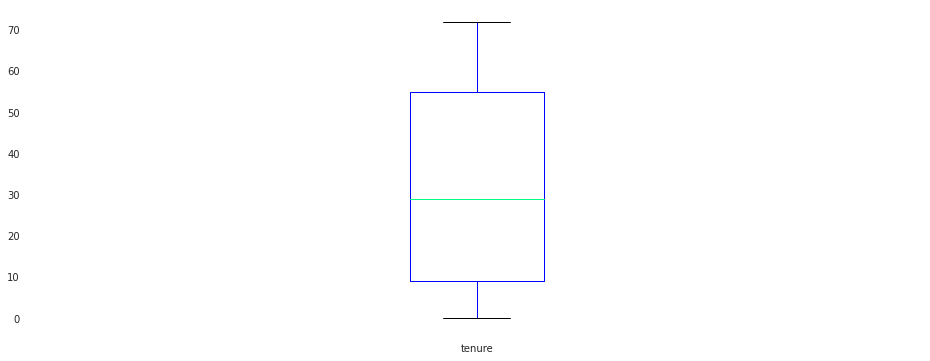

In [ ]:
#PLOTTING BOX PLOTS FOR ALL VARIABLES
df['tenure'].plot(kind='box', stacked=True, figsize=[16,6], colormap='winter') 

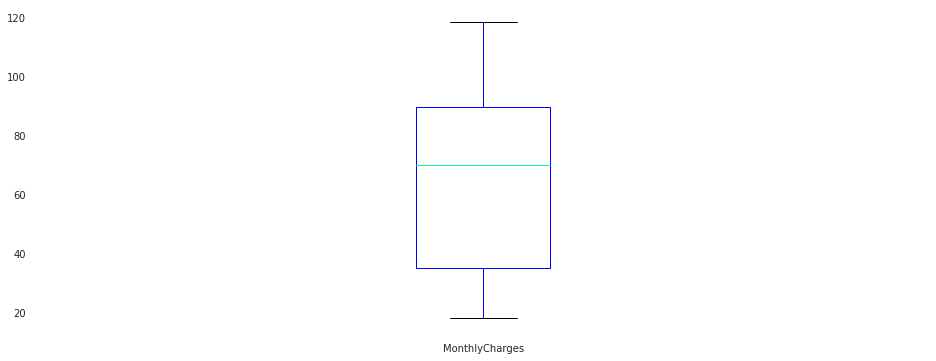

In [ ]:
#PLOTTING BOX PLOTS FOR ALL VARIABLES
df['MonthlyCharges'].plot(kind='box', stacked=True, figsize=[16,6], colormap='winter')

In [ ]:
df.describe()
'''max,min values and 25%,50% ,75% quartile values are shown as below.'''

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Response
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


'max,min values and 25%,50% ,75% quartile values are shown as below.'

In [ ]:
import statsmodels.api as sm
model=sm.Logit(y,x)
result=model.fit()
result.summary()
'''p<0.05 means we need to reject NULL hypothesis and conclude the variables to be significant.hence accordingly,
gender,SeniorCitizen,Dependents,tenure,PhoneService	

InternetService	
OnlineSecurity	
OnlineBackup	
DeviceProtection	
TechSupport	
Contract	
PaperlessBilling	
PaymentMethod	
MonthlyCharges are significant '''


Optimization terminated successfully.
         Current function value: 0.420079
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7024
Method:                           MLE   Df Model:                           18
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.2740
Time:                        12:59:37   Log-Likelihood:                -2958.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.1253      0.063     -1.993      0.046      -0.249      -0.002
SeniorCitizen        0.2085      0.085      2.465      0.014       0.043       0.374
Partner             -0.0111      0.077     -0.144      0.886      -0.162       0.140
Dependents          -0.2448      0.089     -2.759      0.006      -0.419      -0.071
tenure              -0.0352      0.002    -15.070      0.000      -0.040      -0.031
PhoneService        -1.3367      0.131    -10.198      0.000      -1.594      -1.080
MultipleLines        0.0656      0.040      1.628      0.104      -0.013       0.145
InternetService      0.2549      0.064      4.003      0.000       0.130       0.380
OnlineSecurity      -0.3061      0.041     -7.495      0.000      -0.386      -0.226
OnlineBackup        -0.1475      0.038     -3.914      0.000      -0.221      -0.074
DeviceProtection    -0.0916      0.039     -2.344      0.019      -0.168      -0.015
TechSupport         -0.2844      0.042     -6.842      0.000      -0.366      -0.203
StreamingTV          0.0170      0.041      0.414      0.679      -0.063       0.097
StreamingMovies      0.0138      0.041      0.338      0.735      -0.066       0.094
Contract            -0.7270      0.076     -9.561      0.000      -0.876      -0.578
PaperlessBilling     0.2360      0.072      3.293      0.001       0.096       0.377
PaymentMethod       -0.0673      0.030     -2.229      0.026      -0.126      -0.008
MonthlyCharges       0.0249      0.002     13.504      0.000       0.021       0.028
TotalCharges      2.442e-05   1.69e-05      1.442      0.149   -8.78e-06    5.76e-05
====================================================================================
"""

In [ ]:
x=df.corr()
x


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Response
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8512ed5ef0>)

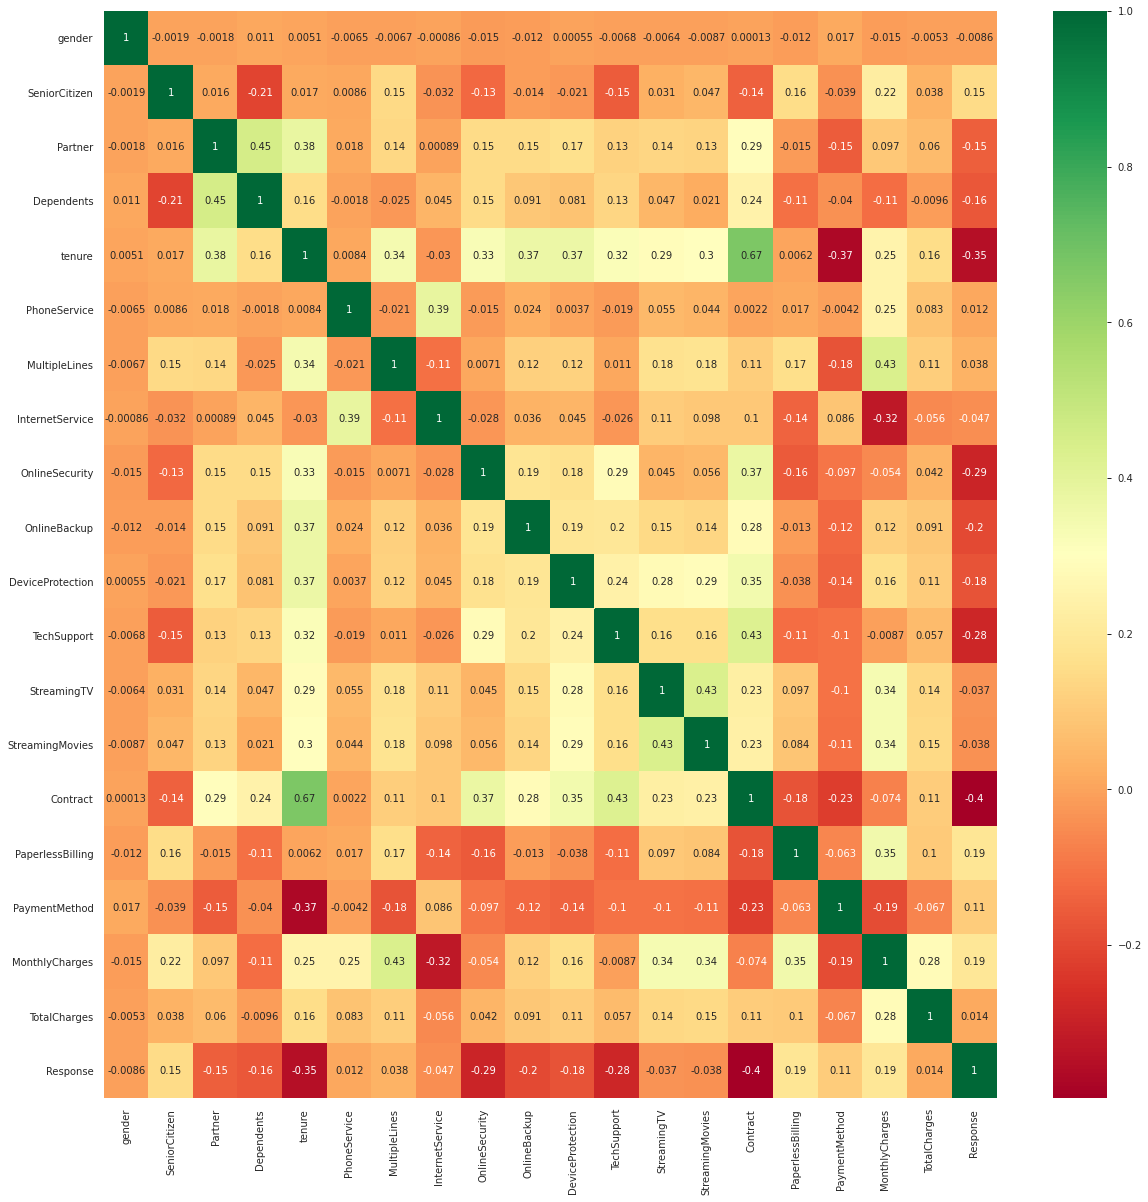

'The figure below is showing response negatively correlated with contract,techsupportonline security and tenure.'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show()
'''The figure below is showing response negatively correlated with contract,techsupportonline security and tenure.'''

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f84fcddf908>)

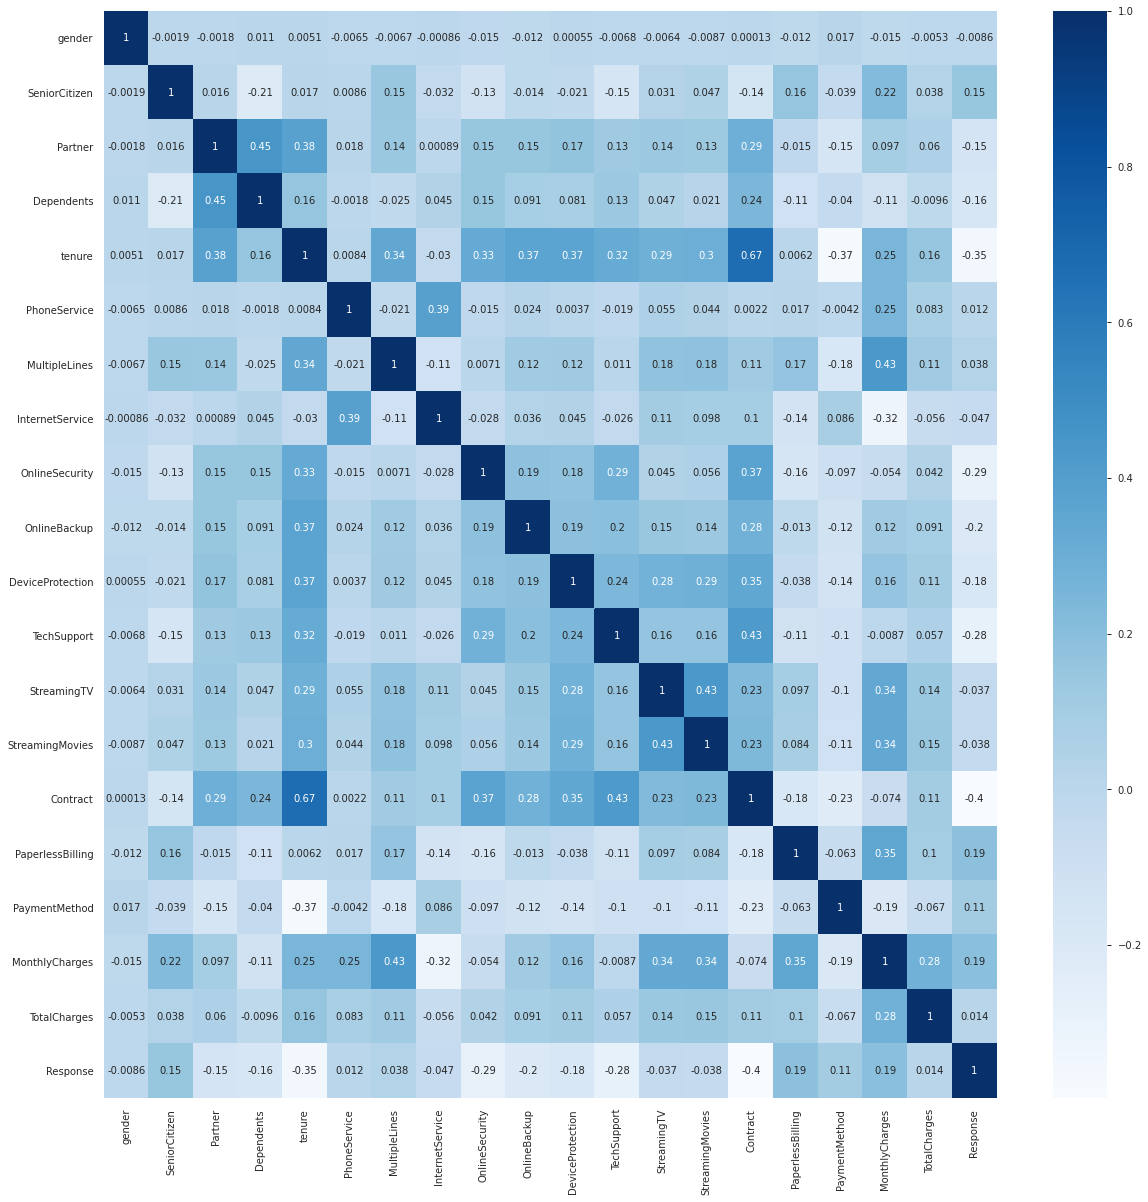

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='Blues',annot=True)
plt.show()

In [ ]:
#BUILD A LOGISTIC REGRESSION MODEL
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)
#lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight = 'balanced')
lmod = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight=None)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(4930, 19)

(2113, 19)

(4930,)

(2113,)

In [ ]:
#FITTING A LOGISTIC REGRESSION MODEL
lmod.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [ ]:
lmod.coef_

array([[-2.07012879e-01,  3.27030775e-01, -1.60275466e-02,
        -3.72975548e-01, -3.42641942e-02, -6.29406885e-01,
         1.64611160e-01,  9.64699806e-02, -2.48543795e-01,
        -1.68539457e-01, -3.21640986e-02, -2.35474315e-01,
         5.14211617e-02,  3.44408821e-03, -9.21928224e-01,
         2.96381860e-01,  9.81798444e-03,  2.06250425e-02,
         4.29421987e-05]])

In [ ]:
#FIND OUT KEY PREDICTOR OF CHURN
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lmod.coef_))],axis=1)

In [ ]:
coeff.columns=("variables","coeff")
coeff.sort_values("variables",ascending=True)

,variables,coeff
14,Contract,-0.921928
3,Dependents,-0.372976
10,DeviceProtection,-0.032164
7,InternetService,0.096470
17,MonthlyCharges,0.020625
6,MultipleLines,0.164611
9,OnlineBackup,-0.168539
8,OnlineSecurity,-0.248544
15,PaperlessBilling,0.296382
2,Partner,-0.016028


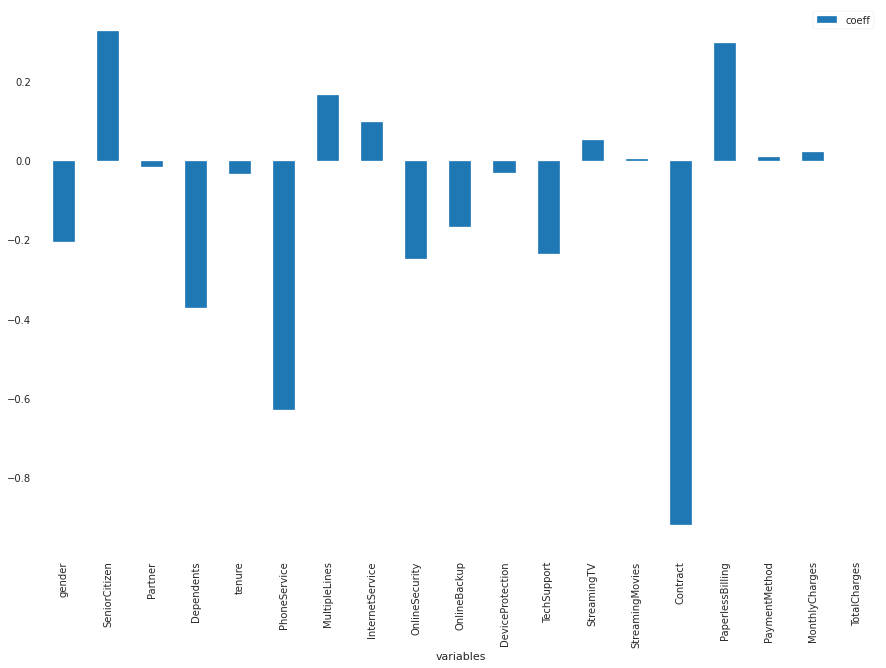

In [ ]:
coeff.plot(x='variables',y='coeff',kind='bar',figsize=(15,10))
plt.show();

In [ ]:
#GENERATE MODEL DIAGNOSTICS
classes=lmod.predict(test_x)
print(classes.size)

2113


In [ ]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 553
Negative cases in Test Data: 1560


In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.7927117841930904


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1560
           1       0.62      0.53      0.57       553

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [ ]:
!jupyter nbconvert module6_test.ipynb

[NbConvertApp] Converting notebook module6_test.ipynb to html
[NbConvertApp] Writing 2688089 bytes to module6_test.html
